In [27]:
import numpy as np
from matplotlib.pyplot import *
from ipywidgets import widgets
from IPython.display import display
%matplotlib notebook

In [29]:
Var = ["N1","P24"] # name of the variables
Nv = len(Var) # number of nodes in the network

ModelToggleButton = widgets.ToggleButtons( options=['Boolean', 'Hill'] )

display(ModelToggleButton)

In [30]:
def activatorHill ( x, betaMin, betaMax, threshold, n ):
    return betaMin + ( (betaMax-betaMin) * x**n ) / ( threshold**n + x**n ) 
def repressorHill ( x, betaMin, betaMax, threshold, n ):
    return betaMin + ( betaMax-betaMin ) / ( 1.0 + (x/threshold)**n )

In [74]:
def f(u, t):
    return [
        u[1] + activatorHill(u[1],1.0,2.0,3.0,40) , 
        -u[0] + activatorHill(u[0],0.3,2.1,2.5,40)
    ]

In [75]:
from scipy.integrate import odeint

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
t = np.linspace(0.0,stoptime,numpoints)

# Pack up the parameters and initial conditions:
w0 = [1.212, 1.1224]

# Call the ODE solver.
wsol = odeint(f, w0, t,atol=abserr, rtol=relerr)


<IPython.core.display.Javascript object>


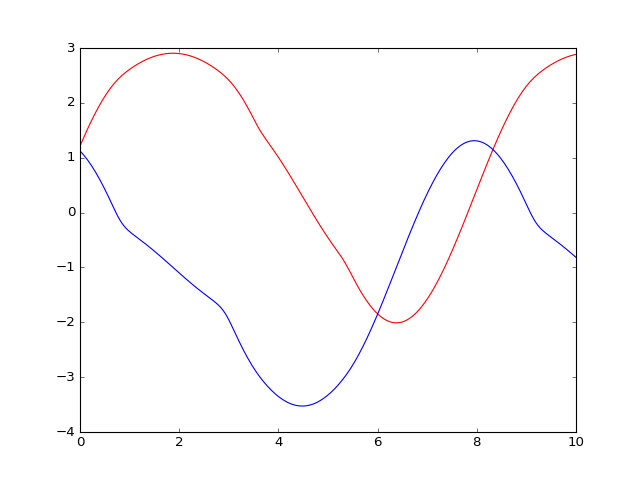

In [78]:
# figure()
plot(t, wsol[:,0], 'r-',t,wsol[:,1],'b-')